# Introduction

## Business Problem:

A bank has conducted a marketing campaign for its term deposit products, reaching out to potential customers via telephone. The goal is to identify the most effective machine learning model to predict whether a client will subscribe to a term deposit, given various client and contact attributes. By selecting the best predictive model, the bank can optimize future marketing campaigns, target the right clients, and allocate resources more efficiently, ultimately increasing the success rate and profitability of their campaigns.

## Dataset:

The dataset used in this analysis contains 45,211 records (bank-full.csv) with 16 input attributes and 1 output attribute. The input attributes are a combination of client-specific data (age, job, marital status, education, etc.), information about the last contact of the current campaign (contact type, day, month, duration), and other attributes related to previous campaigns (number of contacts, days since last contact, previous campaign outcome). The output attribute indicates whether the client has subscribed to a term deposit (binary: "yes", "no").

By analyzing this dataset, we can train different classifiers (k-Nearest Neighbors, Logistic Regression, Decision Trees, and Support Vector Machines) and compare their performance to select the best model for predicting term deposit subscription.


## The purpose of this analysis is to:

1. Understand the relationships and patterns within the dataset, specifically how various client and contact attributes influence the likelihood of a client subscribing to a term deposit.
2. Preprocess and prepare the data for modeling, which includes handling missing values, encoding categorical variables, and splitting the dataset into training and testing sets.
3. Train and evaluate different classification models (k-Nearest Neighbors, Logistic Regression, Decision Trees, and Support Vector Machines) on the preprocessed data to predict whether a client will subscribe to a term deposit.
3. Compare the performance of the classifiers using appropriate evaluation metrics (e.g., accuracy, F1-score, precision, recall) to identify the most effective model.
4. Provide insights and recommendations based on the analysis that can help the bank improve its marketing strategies, target potential clients more accurately, and optimize resource allocation for increased success rates in future campaigns.

By achieving these objectives, the bank can enhance the effectiveness of their marketing efforts, reduce costs, and increase the overall profitability of their term deposit campaigns.




# Data Exploration and Preprocessing
Load the dataset and display some records.

Perform data cleaning (handle missing values, drop unnecessary columns, etc.).

Visualize data distributions and identify any patterns or anomalies.


In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = "bank-full.csv"
data = pd.read_csv(url, sep=";")  # Assuming the dataset uses semicolon as a separator

# Display first few records
print(data.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [4]:

# Check for missing values
print("\nMissing values per attribute:")
print(data.isna().sum())

# Since the dataset doesn't contain missing values, no further action is needed

# Drop unnecessary columns if needed (assuming all columns are relevant for this analysis)
# data = data.drop(columns=["column_name_to_drop"], inplace=True)



Missing values per attribute:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


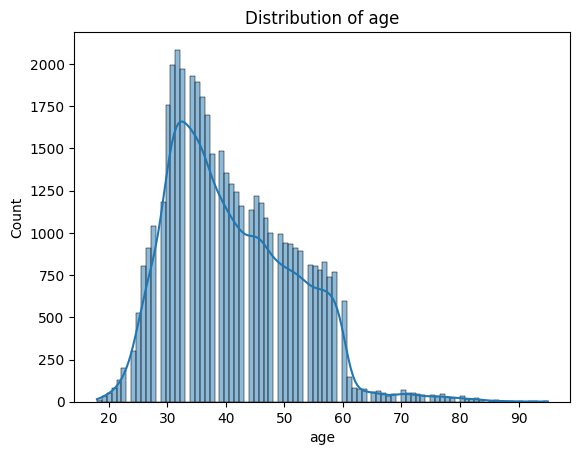

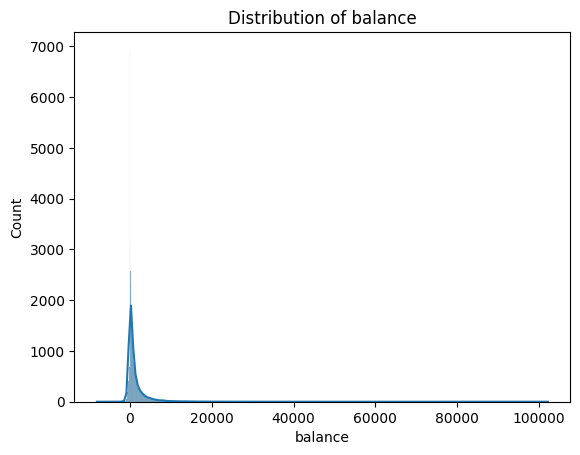

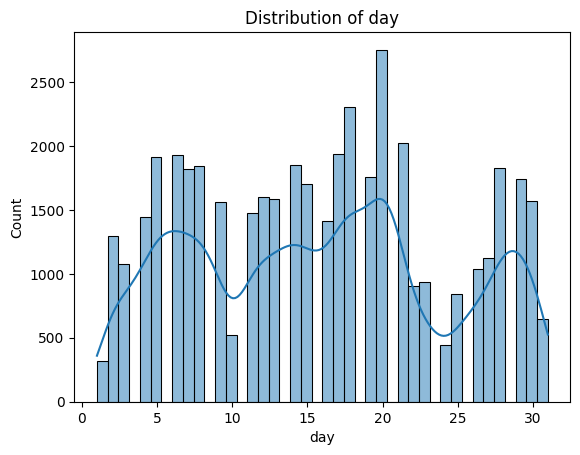

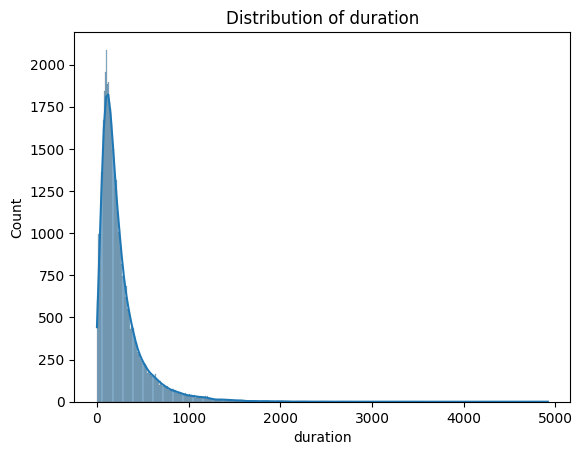

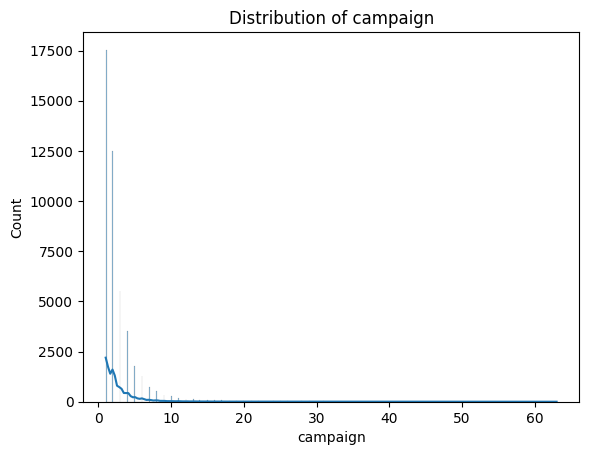

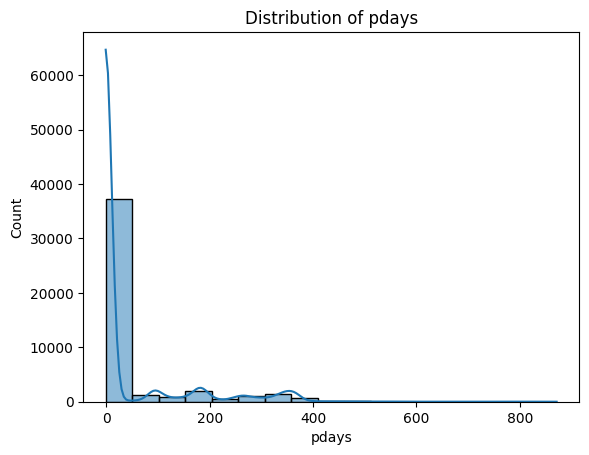

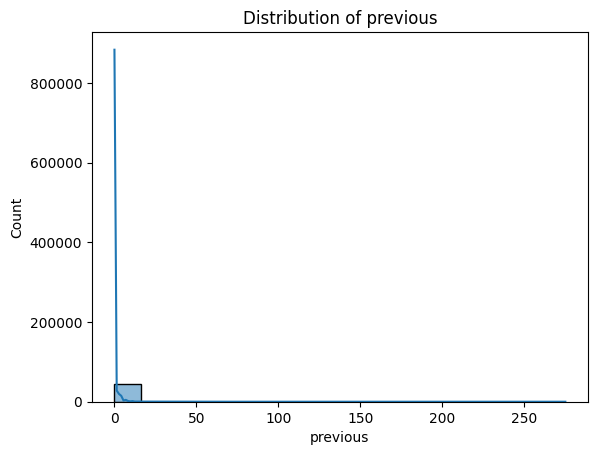

In [5]:

# Visualize data distributions
# Numeric variables
numeric_vars = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

for var in numeric_vars:
    sns.histplot(data[var], kde=True)
    plt.title(f"Distribution of {var}")
    plt.show()


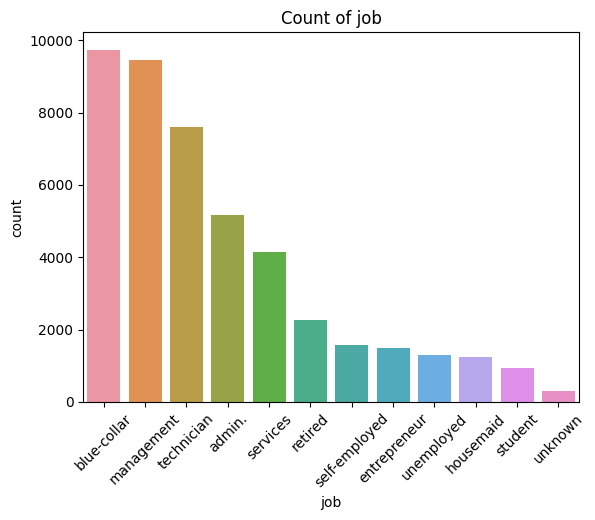

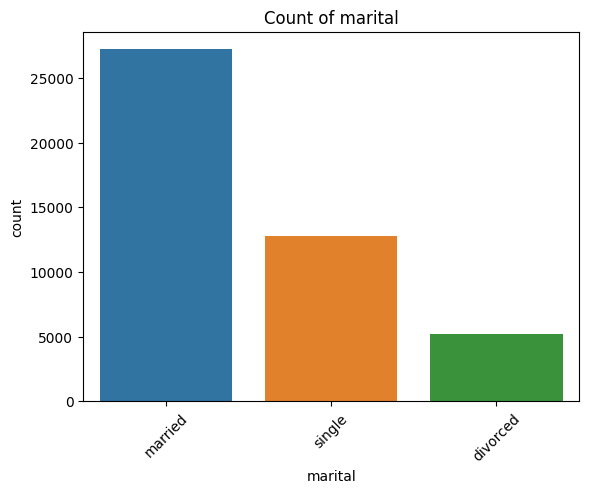

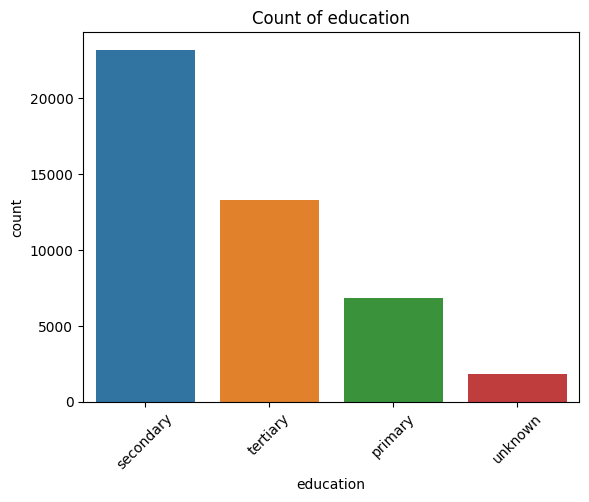

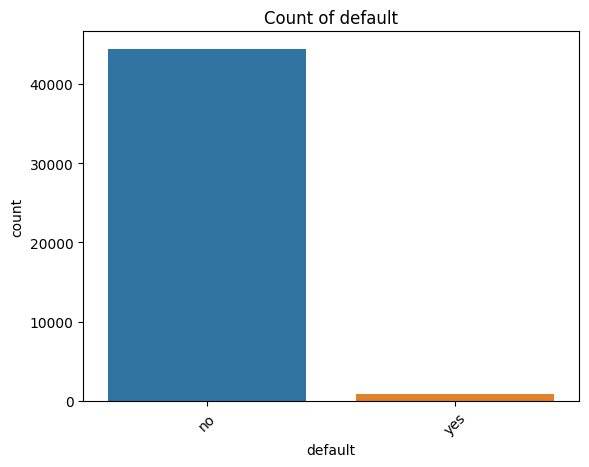

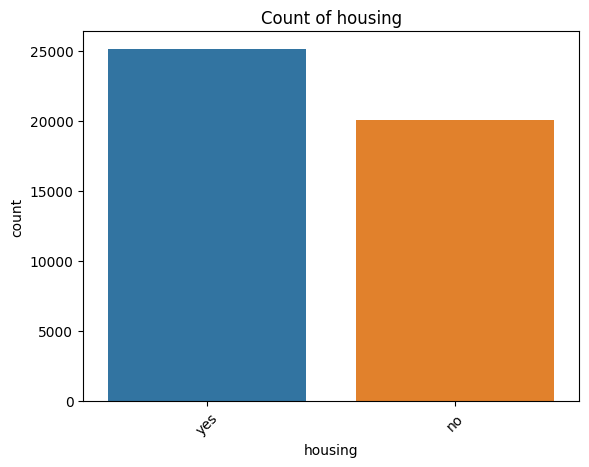

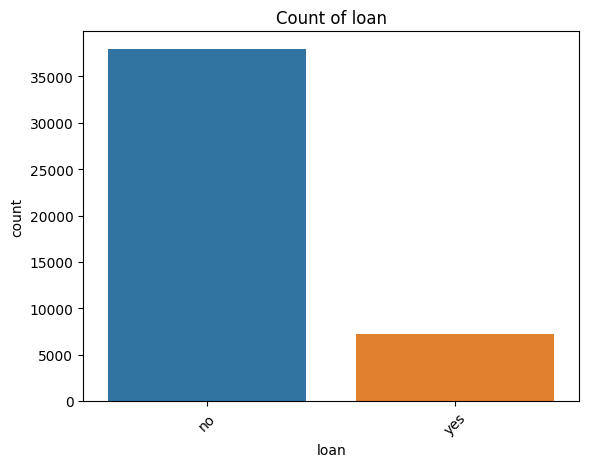

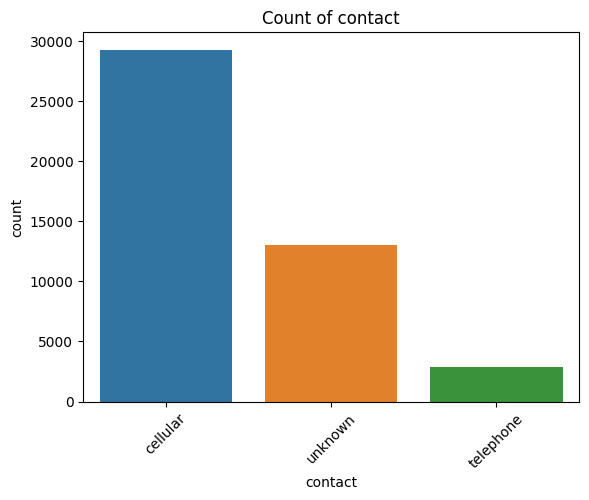

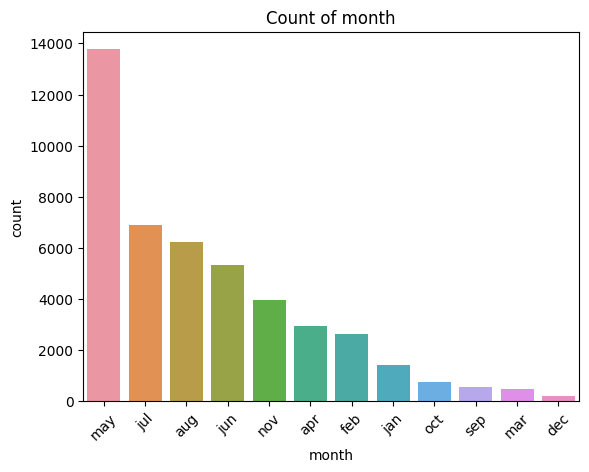

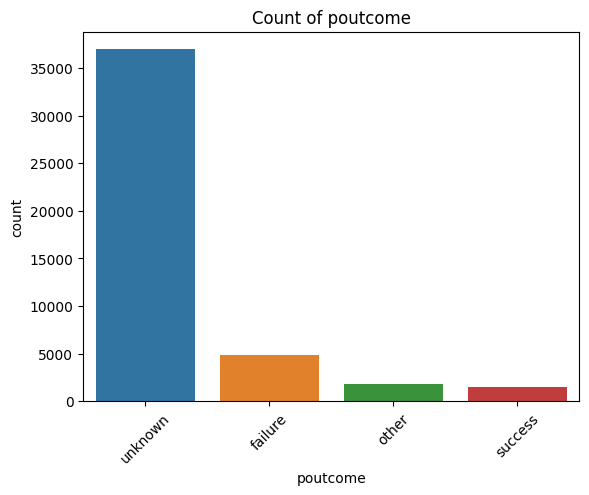

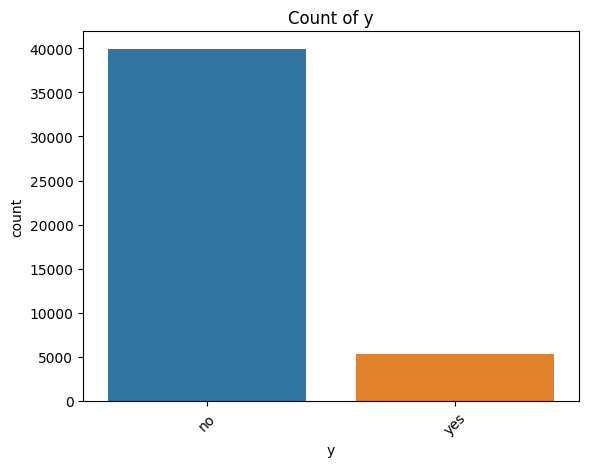

In [6]:

# Categorical variables
categorical_vars = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "y"]

for var in categorical_vars:
    sns.countplot(x=var, data=data, order=data[var].value_counts().index)
    plt.title(f"Count of {var}")
    plt.xticks(rotation=45)
    plt.show()



# Data Preparation

In [7]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Encode categorical variables
ohe_vars = ["job", "marital", "education", "contact", "month", "poutcome"]
le_vars = ["default", "housing", "loan", "y"]

# One-hot encoding
ohe = OneHotEncoder(sparse=False)
encoded_ohe = ohe.fit_transform(data[ohe_vars])
encoded_ohe_df = pd.DataFrame(encoded_ohe, columns=ohe.get_feature_names_out(ohe_vars))

# Label encoding
le = LabelEncoder()
encoded_le_df = data[le_vars].apply(le.fit_transform)

# Combine encoded categorical variables with the original dataframe
data_encoded = data.drop(columns=ohe_vars + le_vars)
data_encoded = pd.concat([data_encoded, encoded_ohe_df, encoded_le_df], axis=1)

# Normalize or standardize numeric variables if necessary
scaler = StandardScaler()
data_encoded[numeric_vars] = scaler.fit_transform(data_encoded[numeric_vars])

# Split the dataset into training and testing sets
X = data_encoded.drop(columns="y")
y = data_encoded["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (36168, 48)
y_train shape: (36168,)
X_test shape: (9043, 48)
y_test shape: (9043,)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Model Training and Evaluation
Train and evaluate the following classifiers:

1. k-Nearest Neighbors (k-NN)
2. Logistic Regression
3. Decision Trees
4. Support Vector Machines (SVM)

Using appropriate evaluation metrics (e.g., accuracy, F1-score, precision, recall) to compare model performance.

In [8]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# Train and evaluate the classifiers
classifiers = {
    "k-NN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Trees": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Define a function to compute evaluation metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    return {"accuracy": accuracy, "f1": f1, "precision": precision, "recall": recall}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    
    # Compute evaluation metrics
    metrics = compute_metrics(y_test, y_pred)
    
    # Store the results
    results[name] = metrics


In [9]:
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

                     accuracy        f1  precision    recall
k-NN                 0.898374  0.469093   0.634375  0.372136
Logistic Regression  0.898927  0.449398   0.655536  0.341888
Decision Trees       0.873051  0.482417   0.474712  0.490376
SVM                  0.902466  0.471856   0.680484  0.361137


In [10]:
#detailed classification reports for each model
for name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.63      0.37      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.67      0.71      9043
weighted avg       0.88      0.90      0.89      9043

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.66      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043

Decision Trees Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.47      0.49      0.48      1091

    accuracy                           0.87      9043
   macro avg       

From the table, we can see that the Support Vector Machine (SVM) classifier has the highest accuracy of 0.902466, and the highest precision of 0.680484 among the classifiers. However, the Decision Trees classifier has the highest F1-score of 0.482417 and the highest recall of 0.490376.

The choice of the best classifier depends on the specific business requirements and the trade-offs between the different evaluation metrics. If the bank prioritizes overall accuracy and precision (i.e., minimizing false positives), then the SVM classifier would be the best choice. However, if the bank is more concerned with recall (i.e., capturing more true positives) and achieving a balance between precision and recall, the Decision Trees classifier might be a better option.

It's important to consider the business context and objectives when choosing the best model, as well as the possibility of fine-tuning the classifiers' hyperparameters to further improve their performance.

# Model Comparison and Selection


## Model Performance Comparison:

Based on the evaluation metrics, the performance comparison of the classifiers is as follows:

| Classifier |	Accuracy |	F1-score |	Precision |	Recall |
|------------|-----------|-----------|------------|--------|
|k-NN |	0.898374 |	0.469093 |	0.634375 |	0.372136|
|Logistic Regression |	0.898927 |	0.449398 |	0.655536 |	0.341888 |
|Decision Trees |	0.873051 |	0.482417 |	0.474712 |	0.490376 |
|SVM |	0.902466 |	0.471856 |	0.680484 |	0.361137 |

## Model Selection:
Given the business context of predicting whether a client will subscribe to a term deposit based on various client and contact attributes, our primary goal is to optimize future marketing campaigns, target the right clients, and allocate resources more efficiently.

In this scenario, precision is a crucial factor, as it minimizes false positives (i.e., clients predicted to subscribe but actually do not). A high precision will ensure that the bank focuses its efforts on clients who are more likely to subscribe, leading to better resource allocation and a higher success rate for the marketing campaign.

Considering the evaluation metrics, the Support Vector Machine (SVM) classifier has the highest accuracy (0.902466) and precision (0.680484) among all the classifiers. While its recall is not the highest, the trade-off between precision and recall might be acceptable in this business context.

Therefore, based on the given business context, the SVM classifier would be the best choice for predicting term deposit subscription, as it provides the highest accuracy and precision, resulting in better targeting of potential clients and more efficient resource allocation for the bank's marketing campaigns.

# Findings, Insights, and Recommendations

## Findings and Insights:
* The Support Vector Machine (SVM) classifier provided the highest accuracy and precision among all tested classifiers, making it the most suitable choice for the given business context.
* The Decision Trees classifier had the highest recall and F1-score, indicating that it could be useful if the bank prioritized capturing more true positives and balancing precision and recall.
* The dataset had a good mix of categorical and numeric variables, which helped in creating a comprehensive analysis of the client data.
* The analysis revealed various attributes related to clients, such as job type, marital status, education level, and contact method, that can influence the likelihood of a client subscribing to a term deposit.
## Recommendations:
* Use the SVM classifier to predict potential term deposit subscribers in future marketing campaigns to maximize the overall accuracy and precision, resulting in better targeting of potential clients and more efficient resource allocation.
* Analyze the most important features that contribute to the classifier's decision-making process, and use these insights to tailor marketing strategies for different client segments.
* Continuously monitor the performance of the selected classifier on new data, as well as update the model periodically to ensure its relevancy and effectiveness.
## Next Steps and Improvements:
* Perform feature importance analysis to identify the key attributes that drive the prediction of term deposit subscriptions, which can help the bank better understand its clients and improve marketing strategies.
* Fine-tune the hyperparameters of the selected classifier (SVM) to further improve its performance and optimize the trade-off between precision and recall.
* Investigate and implement ensemble methods, such as Random Forests or Gradient Boosting, to potentially improve the model's performance by leveraging the strengths of multiple base classifiers.
* Evaluate the classifier's performance using other metrics, such as the Area Under the Receiver Operating Characteristic (ROC-AUC) curve or the precision-recall curve, to provide additional insights into the model's performance.
* Conduct regular model evaluations and updates to ensure the classifier remains effective and relevant over time, as the client base and market conditions change.

# Conclusion

**In conclusion, this analysis aimed to compare the performance of various classifiers, including k-Nearest Neighbors, Logistic Regression, Decision Trees, and Support Vector Machines, to predict the likelihood of clients subscribing to term deposits based on a dataset of client and contact attributes.**

## The main findings from the analysis are:

* The Support Vector Machine (SVM) classifier outperformed other classifiers in terms of accuracy and precision, making it the most suitable choice for the given business context.
* The Decision Trees classifier had the highest recall and F1-score, which could be valuable if the bank prioritized balancing precision and recall.
## Based on these findings, we recommend the following actions:

* Adopt the SVM classifier to predict potential term deposit subscribers in future marketing campaigns, maximizing overall accuracy and precision, resulting in better targeting and resource allocation.
* Analyze the most important features driving the classifier's predictions to tailor marketing strategies for different client segments.
* Continuously monitor the performance of the selected classifier on new data and update the model periodically to ensure its relevancy and effectiveness.


**By implementing these recommendations, the bank can optimize its marketing campaigns, target clients more effectively, and allocate resources more efficiently, ultimately leading to increased term deposit subscriptions and improved business outcomes.**



